In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pickle

# Funções

In [ ]:
def barplot_grid(data, nrows, ncols, figsize, columns_dict, x, hue, palette, estimator='median', errorbar = None, err_kws = None):
    """
    Função que plota vários gráficos de barra em uma grade semelhante a uma matriz, em que é possível determinar a sua organização em relação ao número de linhas e colunas
    Parâmetros:
        -data: Dataframe com os dados
        -nrows: número de linhas na grade
        -ncols: número de colunas da grade
        -figsize: tamanhoda figura em que os gráficos serão plotados
        -columns_dict: dicionário contendo o nome das colunas de interesse de data que serão plotadas. As chaves correspondem a valores numéricos que devem começar em 0 e irem aumentando em 1 unidade a cada entrada nova e os valores correspondem ao nome da coluna de interesse
        -x: variável categórica para ser plotada no eixo das abscissas
        -hue: parâmetro que segmenta as colunas em outras categorias presentes em variáveis categóricas diferente de x
        -palette: palleta de cores para estilizar o gráfico
        -estimator='median': parâmetro que diz qual métrica deverá ser utilizada para resumir os dados. O padrão é a mediana
        -errorbar = None: parâmetro que indica se deverá ter barra de erro no gráfico
        -err_kws = None: parâmetro para personalizar a barra de erro
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = figsize, tight_layout=True)

    c = 0
    for lin in range(nrows):
        for col in range(ncols):
            legend_status = False
            if c == nrows:
                legend_status = 'auto'
            sns.barplot(
                data = data,
                x = x,
                y = columns_dict[c],
                hue = hue,
                palette=palette,
                ax = axes[lin, col],
                legend=legend_status,
                estimator = estimator,
                errorbar = errorbar,
                err_kws = err_kws
            )

            axes[lin, col].set_title(f"Gráfico {c + 1}: {columns_dict[c]} x {x}")
            axes[lin, col].set_ylabel('')
            axes[lin, col].set_xlabel('')
            c += 1

    plt.show()

def boxplot_grid(data, nrows, ncols, figsize, columns_dict, x, hue, palette, width):
    """
    Função que plota vários gráficos do tipo boxplot em uma grade semelhante a uma matriz, em que é possível determinar a sua organização em relação ao número de linhas e colunas
    Parâmetros:
        -data: Dataframe com os dados
        -nrows: número de linhas na grade
        -ncols: número de colunas da grade
        -figsize: tamanhoda figura em que os gráficos serão plotados
        -columns_dict: dicionário contendo o nome das colunas de interesse de data que serão plotadas. As chaves correspondem a valores numéricos que devem começar em 0 e irem aumentando em 1 unidade a cada entrada nova e os valores correspondem ao nome da coluna de interesse
        -x: variável categórica para ser plotada no eixo das abscissas
        -hue: parâmetro que segmenta as colunas em outras categorias presentes em variáveis categóricas diferente de x
        -palette: palleta de cores para estilizar o gráfico
        -width: indica qual deve ser a largura dos elementos do gráfico
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = figsize, tight_layout=True)

    c = 0
    for lin in range(nrows):
        for col in range(ncols):
            legend_status = False
            if c == nrows:
                legend_status = 'auto'
            sns.boxplot(
                data = data,
                x = x,
                y = columns_dict[c],
                hue = hue,
                palette=palette,
                ax = axes[lin, col],
                legend=legend_status,
                width=width
            )

            axes[lin, col].set_title(f"Gráfico {c + 1}: {columns_dict[c]} x {x}")
            axes[lin, col].set_ylabel('')
            axes[lin, col].set_xlabel('')
            c += 1

    plt.show()


# Análise Exploratória de Dados

In [2]:
# carregando dataset
base = pd.read_csv(r'C:\Users\Airton\Documents\Projetos\Bases\PSs\INDICIUM\teste_indicium_precificacao.csv')

In [3]:
# resumo do dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
# verificando a soma de valores vazios
base.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [6]:
# preenchendo com 0 os valorez vazios
base['reviews_por_mes'].fillna(0, inplace=True)
base['ultima_review'].fillna(0, inplace=True)

In [7]:
# verificando estatísticas dos reviews mensais
base.reviews_por_mes.describe()

count    48894.000000
mean         1.090928
std          1.597294
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_por_mes, dtype: float64

In [8]:
# carregando paleta de cores
cores = sns.cubehelix_palette(rot=-.2, n_colors=3, reverse=True)

In [9]:
cores

[[0.12477747242939481, 0.14301384659371646, 0.2473475773038177],
 [0.3848176912590595, 0.531820270917364, 0.6612863079072677],
 [0.7680578755197892, 0.8841756194023903, 0.8990850578218313]]

In [11]:
# dicionário para plotar os gráficos
colunas_plot_grid = {
    0: 'price',
    1: 'minimo_noites',
    2: 'calculado_host_listings_count',
    3: 'disponibilidade_365',
    4: 'numero_de_reviews',
    5: 'reviews_por_mes'
}


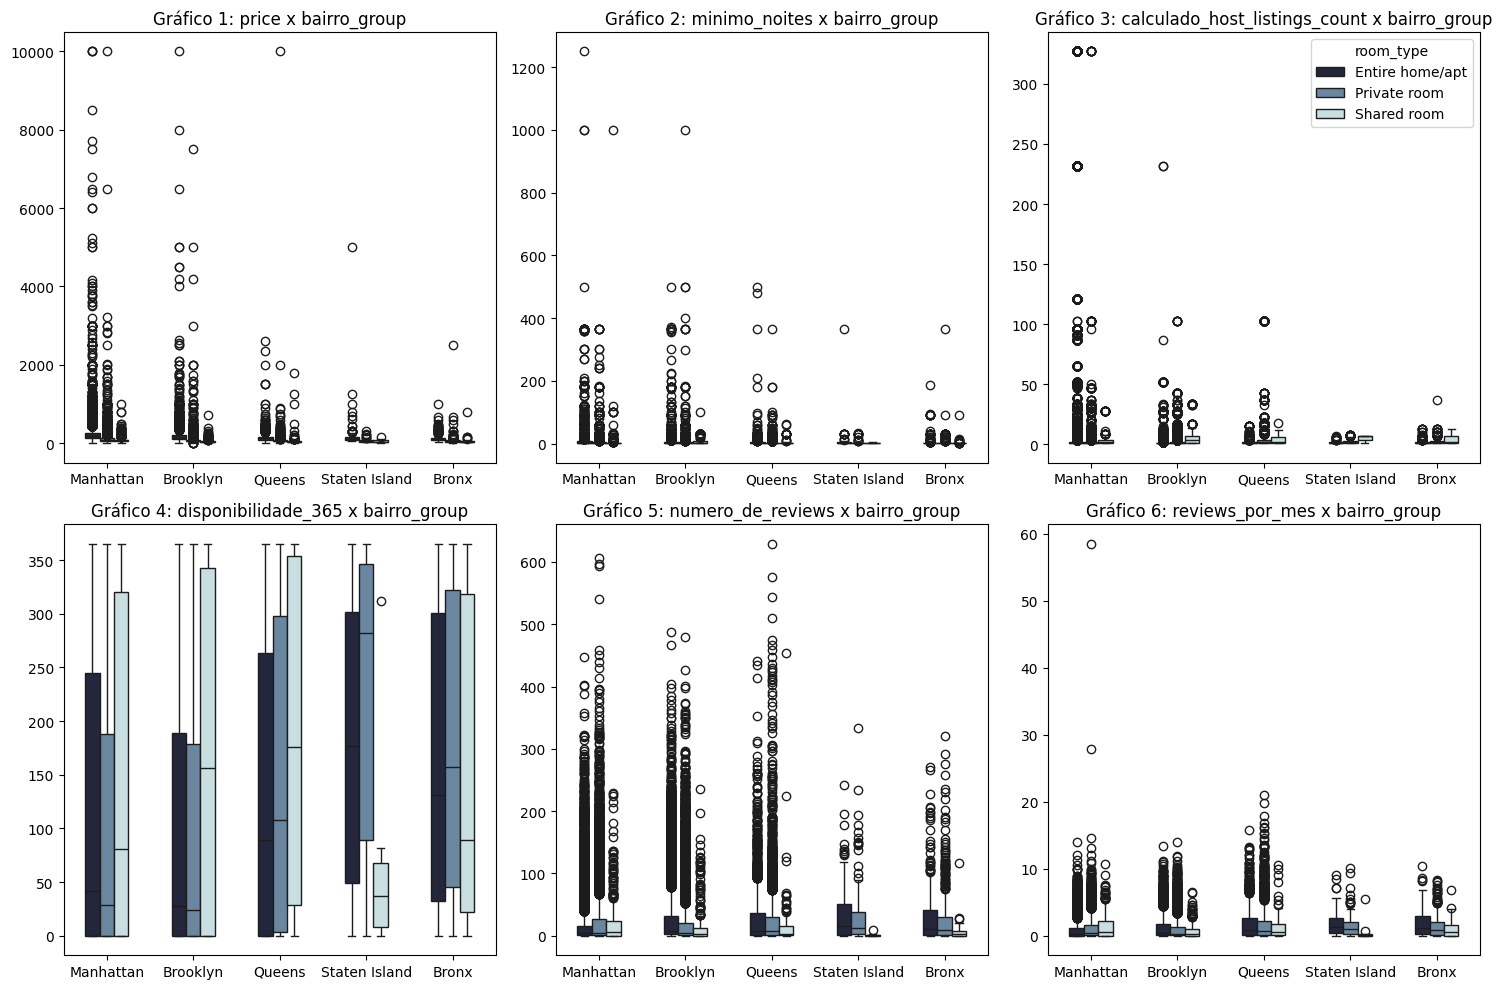

In [12]:
boxplot_grid(
    data=base,
    nrows=2,
    ncols=3,
    figsize=(15, 10),
    columns_dict=colunas_plot_grid,
    x='bairro_group',
    hue='room_type',
    palette=cores,
    width=0.5
)

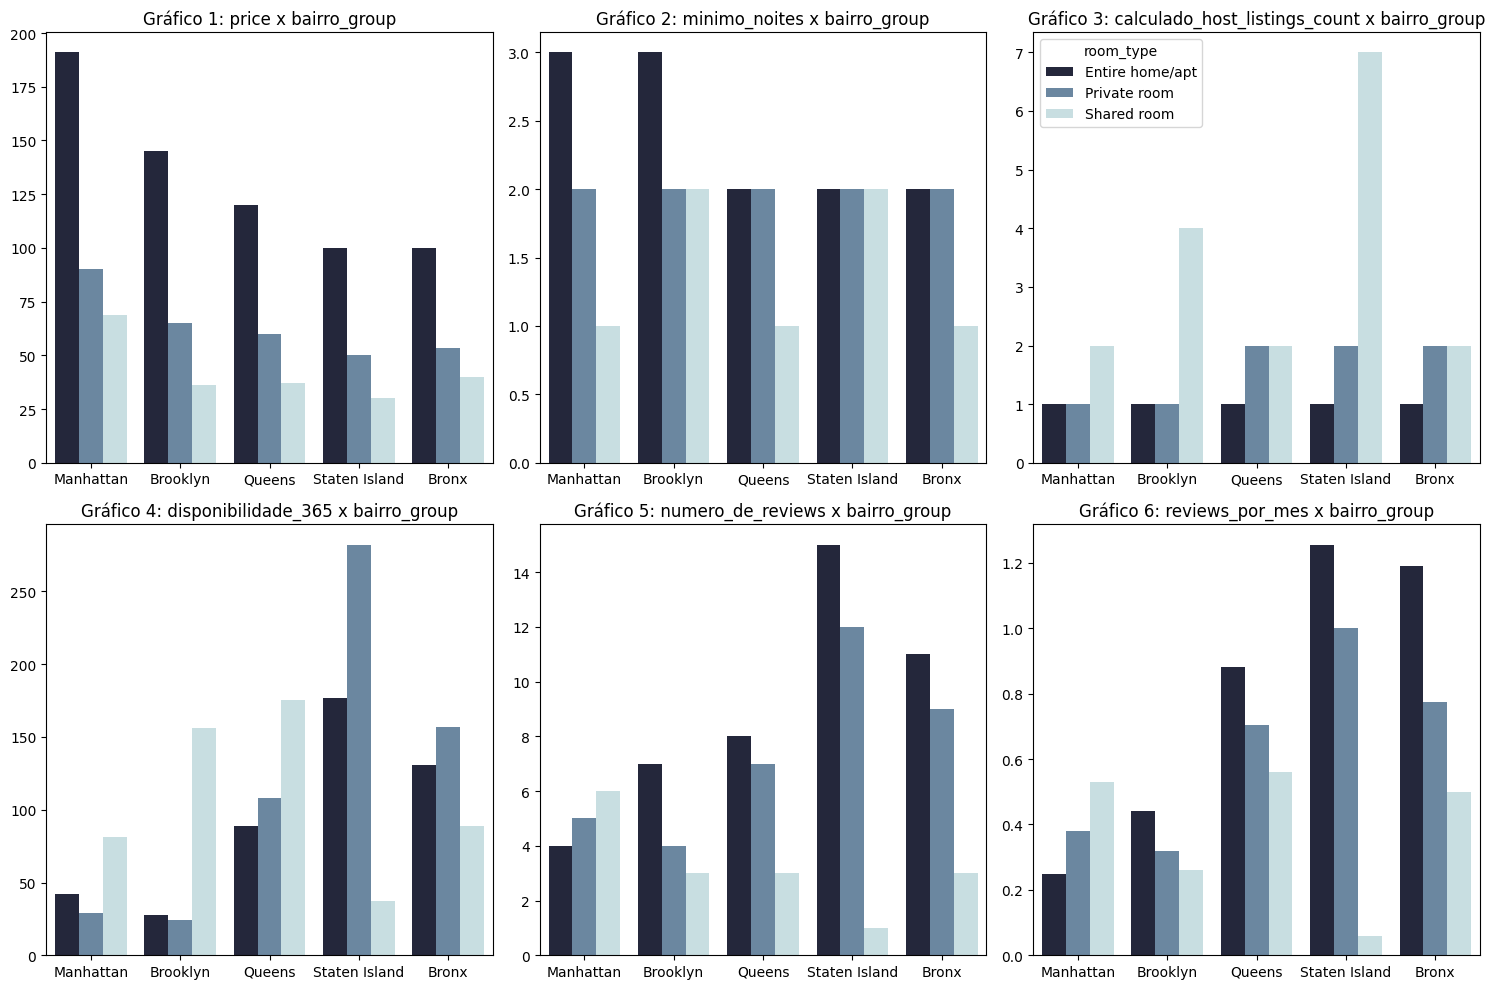

In [13]:
barplot_grid(
    data=base,
    nrows=2,
    ncols=3,
    figsize=(15, 10),
    columns_dict=colunas_plot_grid,
    x='bairro_group',
    hue='room_type',
    palette=cores,
    estimator='median'
)

In [14]:
base.groupby(['bairro_group', 'room_type']).size()

bairro_group   room_type      
Bronx          Entire home/apt      379
               Private room         652
               Shared room           60
Brooklyn       Entire home/apt     9559
               Private room       10131
               Shared room          413
Manhattan      Entire home/apt    13199
               Private room        7982
               Shared room          480
Queens         Entire home/apt     2096
               Private room        3372
               Shared room          198
Staten Island  Entire home/apt      176
               Private room         188
               Shared room            9
dtype: int64

<Axes: >

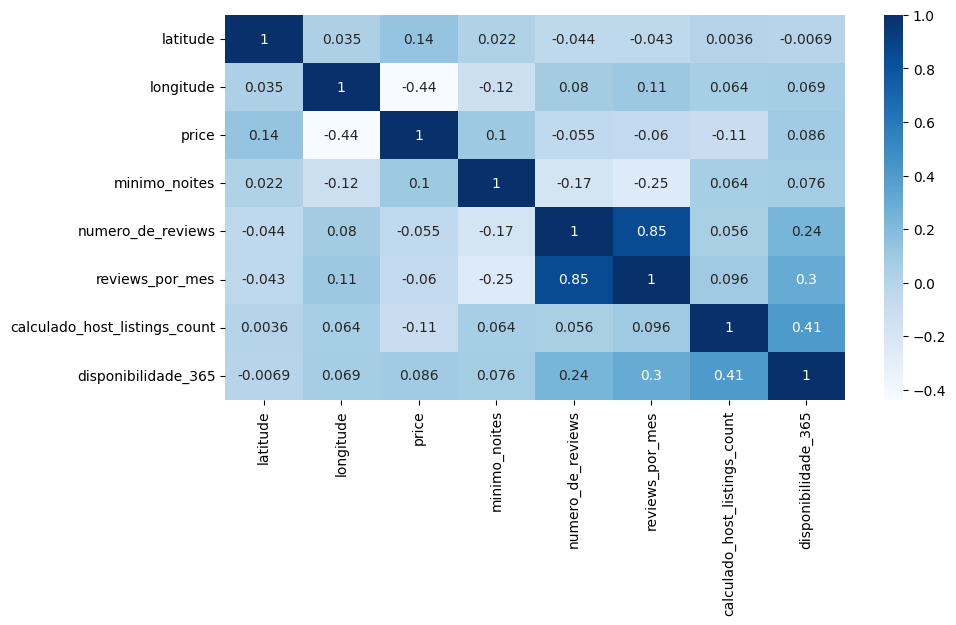

In [15]:
colunas_heatmap = [column for column in base.columns if column not in ['id', 'host_id']]
plt.figure(figsize=(10, 5))
sns.heatmap(base[colunas_heatmap].corr(method='spearman', numeric_only=True), annot=True, cmap='Blues')

## Tentando determinar padrão nos locais com preços mais altos

In [16]:
local_name = [nome for nome in base.sort_values(by='price', ascending=False).bairro_group.unique()]
local_code = [code for code in range(len(local_name))]

map_dict = dict(zip(local_name, local_code))

In [17]:
pattern_df = base.sort_values(by='price', ascending=False)[['price','bairro_group', 'bairro']]
pattern_df['bairro_encode'] = pattern_df.bairro_group.apply(lambda x: map_dict[x]) # encodando os nomes dos bairros
pattern_df

,price,bairro_group,bairro,bairro_encode
9150,10000,Queens,Astoria,0
29237,10000,Manhattan,Upper West Side,1
17691,10000,Brooklyn,Greenpoint,2
12341,9999,Manhattan,Lower East Side,1
40432,9999,Manhattan,Lower East Side,1
...,...,...,...,...
26258,0,Manhattan,Murray Hill,1
25633,0,Brooklyn,Bushwick,2
25793,0,Brooklyn,Bedford-Stuyvesant,2
25794,0,Brooklyn,Bedford-Stuyvesant,2


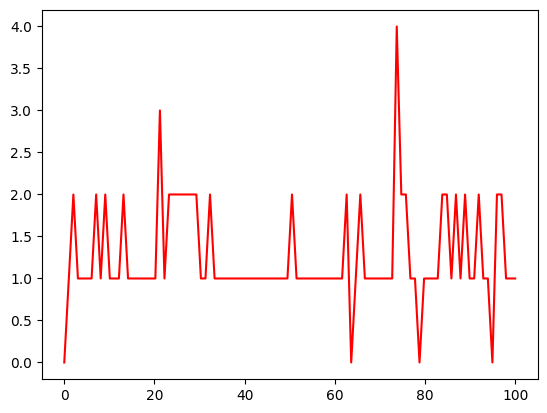

In [18]:
# gráfico resultante da plotagem dos códigos de cada categoria possível em "bairro_group"
x = np.linspace(0, 100, 100)
plt.plot(x, pattern_df.bairro_encode[:100], 'r')
plt.show()

# REGRESSÃO

In [19]:
encoder = OneHotEncoder()

categoricas_encode = encoder.fit_transform(base[['bairro_group', 'room_type']]).toarray()

df_categoricas_encode = pd.DataFrame(categoricas_encode, columns=encoder.get_feature_names_out(['bairro_group', 'room_type']))

In [20]:
drop_names = ['id', 'host_id', 'nome', 'host_name', 'bairro', 'bairro_group', 'room_type', 'ultima_review', 'latitude', 'longitude']

In [21]:
base_reg = base.drop(drop_names, axis=1)

In [22]:
base_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          48894 non-null  int64  
 1   minimo_noites                  48894 non-null  int64  
 2   numero_de_reviews              48894 non-null  int64  
 3   reviews_por_mes                48894 non-null  float64
 4   calculado_host_listings_count  48894 non-null  int64  
 5   disponibilidade_365            48894 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 2.2 MB


In [23]:
scalar = MinMaxScaler()

normalized_features = scalar.fit_transform(base_reg)

df_nomalized = pd.DataFrame(normalized_features, columns = base_reg.columns.tolist())

In [24]:
dataset = pd.concat([df_categoricas_encode, df_nomalized, base[['price']]], axis=1)

In [25]:
X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [26]:
model_multi_linear = LinearRegression()

model_multi_linear.fit(X_train, y_train)

y_pred_multi_linear = model_multi_linear.predict(X_test)

r2_multi_linear = r2_score(y_test, y_pred_multi_linear)

mse_multi_linear = mean_squared_error(y_test, y_pred_multi_linear)

In [27]:
model_ridge = Ridge()

model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [28]:
model_lasso = Lasso()

model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [29]:
print(f"Multi Linear → R²: {r2_multi_linear}; MSE: {mse_multi_linear}")
print(f"Ridge → R²: {r2_ridge}; MSE: {mse_ridge}")
print(f"Lasso → R²: {r2_lasso}; MSE: {mse_lasso}")

Multi Linear → R²: 0.1541431926390735; MSE: 13071.094338204673
Ridge → R²: 0.15423095994557007; MSE: 13069.736932046202
Lasso → R²: 0.15423095994557007; MSE: 13134.521408250082


In [30]:
with open('model_pickle.pkl', 'wb') as model:
    pickle.dump(model_multi_linear, model)

In [31]:
new_data = pd.DataFrame([{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}])


In [35]:
encode_new_data = encoder.transform((new_data[['bairro_group', 'room_type']])).toarray()

new_data_encode = pd.DataFrame(encode_new_data, columns=encoder.get_feature_names_out(['bairro_group', 'room_type']))


pred_data = new_data.drop(drop_names, axis=1)

new_data_normalized = scalar.transform(pred_data)

norm_new_data = pd.DataFrame(new_data_normalized, columns = base_reg.columns.tolist())

pred_dataset = pd.concat([new_data_encode, norm_new_data], axis=1).drop('price', axis=1)

In [38]:
y = model_multi_linear.predict(pred_dataset)